In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Toy Monte Carlo

Here I simulate a probability calculation with some simple Monte Carlo, numpy used for speed at sacrifice of a bit of readability. This simulates probability throws and calculates estimates for probability from the resulting statistics.

1. run_2ltoymc: Events with a two probability throws, count events with two passes and events with one pass, calculate probability
2. returns the difference from the true probability (bias)

In [3]:
def run_2ltoymc(true_probability = 0.6, initial_sample_size = 100000):
    """
    Probability calculation from events with two probability trials
    Calculation uses the more simplistic N1 and N2 terminology
    """
    
    # Each event has two independent trials of true_probability
    # These arrays hold True/False information for whether a pass/fail on the true_probability check
    l1 = np.random.uniform(size=initial_sample_size) < true_probability
    l2 = np.random.uniform(size=initial_sample_size) < true_probability
        
    # Count number of events with 2 passes and 1 pass
    n2_count = (l1 & l2).sum()
    n1_count = np.logical_xor(l1, l2).sum()
    
    # there is no knowledge of events where both trials fail
    
    # simply the ratio of checks that passed to the total checks
    estimated_probability = (2*n2_count)/(n1_count + 2*n2_count)

    return estimated_probability - true_probability

# Trialing the 2l Toy Model

First Compare the 2l Toy MC model. Will plot the resulting distributions of "estimated_probability - true_probability" and note the average value.

Inputs:
1. TRUE_PROBABILITY = 0.6
2. INITIAL_SAMPLE_SIZE = 20, 100, 1000, 10000

This bias is centred on zero even for low INITIAL_SAMPLE_SIZE, tightens as INITIAL_SAMPLE_SIZE increases

In [9]:
def make_distribution_plot(N_TOYS = 100000, TRUE_PROBABILITY = 0.6, INITIAL_SAMPLE_SIZE = 20):
    toy_probability_deltas = np.array([run_2ltoymc(true_probability = TRUE_PROBABILITY, initial_sample_size = INITIAL_SAMPLE_SIZE) for i in range(N_TOYS)])
    
    bias = np.mean(toy_probability_deltas)
    bias_err = np.std(toy_probability_deltas)/(N_TOYS)**0.5

    plt.hist(toy_probability_deltas, bins=np.linspace(-0.5, 0.5, 101))
    plt.title("2l Toy MC, Initial Sample Size={}, Mean Bias = {:.7f} +/- {:.7f}".format(INITIAL_SAMPLE_SIZE, bias, bias_err))
    #plt.xlim(-0.5, 0.5)
    plt.xlabel("estimated_probability - true_probability")
    plt.ylabel("frequency")
    plt.grid()
    plt.show()

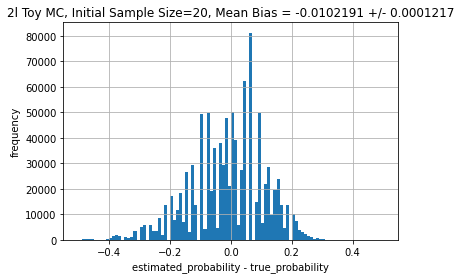

In [10]:
make_distribution_plot(N_TOYS = 1000000, TRUE_PROBABILITY = 0.6, INITIAL_SAMPLE_SIZE = 20)

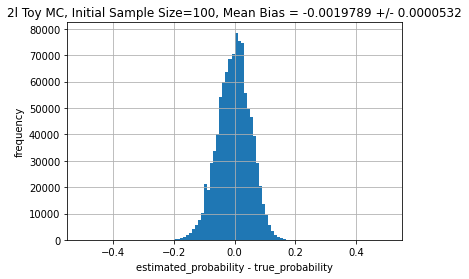

In [11]:
make_distribution_plot(N_TOYS = 1000000, TRUE_PROBABILITY = 0.6, INITIAL_SAMPLE_SIZE = 100)

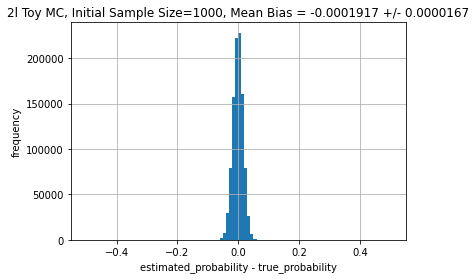

In [12]:
make_distribution_plot(N_TOYS = 1000000, TRUE_PROBABILITY = 0.6, INITIAL_SAMPLE_SIZE = 1000)

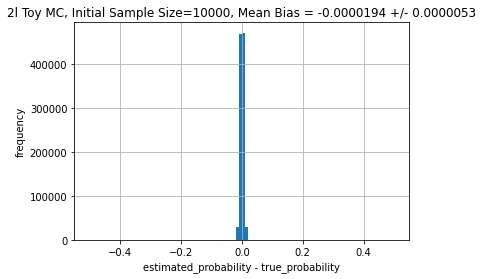

In [13]:
make_distribution_plot(N_TOYS = 1000000, TRUE_PROBABILITY = 0.6, INITIAL_SAMPLE_SIZE = 10000)

# Scan of the 2l Toy Model

A scan of "estimated_probability - true_probability" as a function of INITIAL_SAMPLE_SIZE
Inputs:
1. TRUE_PROBABILITY = 0.6
2. INITIAL_SAMPLE_SIZE = [20...1000]

In [61]:
x_vals = [i for i in range(20, 1000)]
y_vals = []

N_TOYS = 100000
TRUE_PROBABILITY = 0.6

for initial_sample in x_vals:
    toy_probability_deltas = np.array([run_2ltoymc(true_probability = TRUE_PROBABILITY, initial_sample_size = initial_sample) for i in range(N_TOYS)])
    bias = np.mean(toy_probability_deltas)
    y_vals.append(bias)

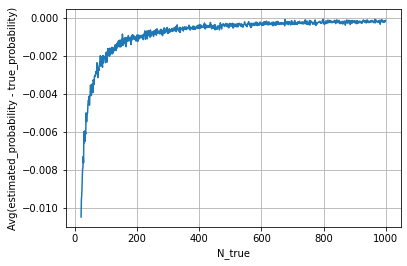

In [62]:
plt.plot(np.array(x_vals), np.array(y_vals))
plt.xlabel("N_true")
plt.ylabel("Avg(estimated_probability - true_probability)")
plt.grid()
plt.show()